<a href="https://colab.research.google.com/github/pysr1/h2o/blob/master/auto_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%bash
apt-get install default-jre
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [0]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1, keep_cross_validation_models=True)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 hours 22 mins
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_unknownUser_6qmk00
H2O cluster total nodes:,1
H2O cluster free memory:,2.519 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190822_014733,0.790214,0.551084,0.324954,0.431938,0.18657
StackedEnsemble_BestOfFamily_AutoML_20190822_014733,0.788471,0.552618,0.323182,0.432714,0.187241
XGBoost_grid_1_AutoML_20190822_014733_model_3,0.78538,0.55838,0.333409,0.434884,0.189124
XGBoost_3_AutoML_20190822_014733,0.784162,0.558118,0.340129,0.435162,0.189366
XGBoost_grid_1_AutoML_20190822_014733_model_4,0.783842,0.557377,0.312392,0.435045,0.189264
XGBoost_1_AutoML_20190822_014733,0.782782,0.557031,0.331908,0.43506,0.189277
XGBoost_2_AutoML_20190822_014733,0.782426,0.557296,0.326804,0.435181,0.189383
XGBoost_grid_1_AutoML_20190822_014733_model_1,0.781559,0.561901,0.330242,0.436658,0.190671
GBM_5_AutoML_20190822_014733,0.780344,0.558723,0.334826,0.436138,0.190216
GBM_1_AutoML_20190822_014733,0.780286,0.560701,0.316822,0.43642,0.190462


In [0]:
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [0]:
leader = aml.leader

In [0]:
aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.754136,0.245864
0,0.70948,0.29052
1,0.547284,0.452716
1,0.329054,0.670946
1,0.668722,0.331278
1,0.3049,0.6951
1,0.262321,0.737679
1,0.656457,0.343543
1,0.571741,0.428259
0,0.833949,0.166051


In [0]:
leader_board = aml.leaderboard.as_data_frame()


In [0]:
leader_board.head()

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20190822_014733,0.790214,0.551084,0.324954,0.431938,0.186570
1,StackedEnsemble_BestOfFamily_AutoML_20190822_0...,0.788471,0.552618,0.323182,0.432714,0.187241
2,XGBoost_grid_1_AutoML_20190822_014733_model_3,0.785380,0.558380,0.333409,0.434884,0.189124
3,XGBoost_3_AutoML_20190822_014733,0.784162,0.558118,0.340129,0.435162,0.189366
4,XGBoost_grid_1_AutoML_20190822_014733_model_4,0.783842,0.557377,0.312392,0.435045,0.189264


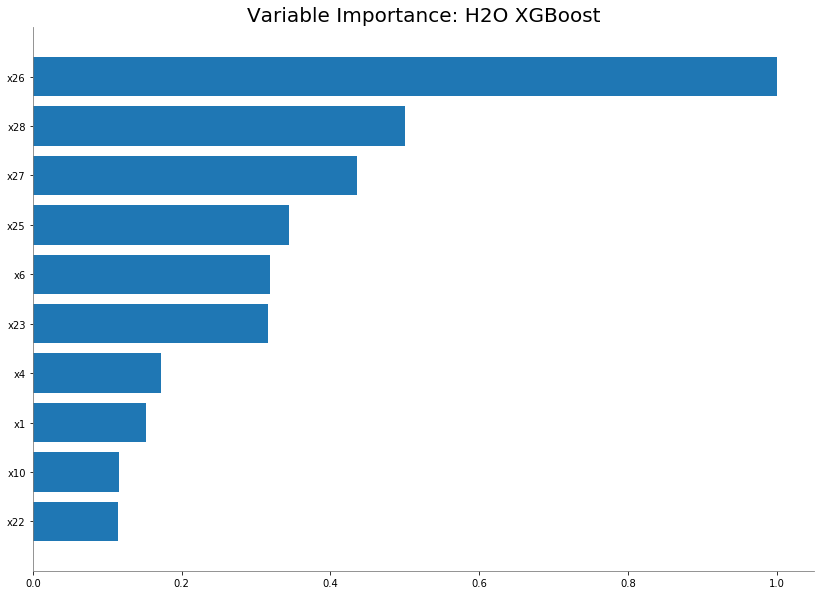

In [0]:
xgboost = h2o.get_model(leader_board['model_id'][2])
xgboost.varimp_plot()